Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Aditya\Downloads\Automobile_insurance_fraud.csv")
pd.set_option("display.max_columns",40)
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [4]:
#in _c39 there is null values present in entire column so i can remove this from data set 
data.drop('_c39',axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
#categories in object dtype
data.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
policy_bind_date,1000,951,05-08-1992,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,02-02-2015,28
incident_type,1000,4,Multi-vehicle Collision,419


In [7]:
data.head()    

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [8]:
#we observe that in some fetures has a special character data '?'
#finding features has '?'
missing_data = []
for i in data.columns:
    if '?' in data[i].values:
        missing_data.append(i)

missing_data

['collision_type', 'property_damage', 'police_report_available']

In [9]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [10]:
data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [11]:
#observation:-
#'?' data is high count in this particular feature i cannot replace it by mode because count of missing data is high

In [12]:
data['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [13]:
#observation:-
#i can replace '?' by nan

In [14]:
data=data.replace('?',np.nan)

In [15]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [16]:
null_data_cols=data.isnull().sum()[data.isnull().sum()>0].index
null_data_cols

Index(['collision_type', 'property_damage', 'police_report_available'], dtype='object')

In [17]:
#filling null values
#by using random sampling for missing data
for col in null_data_cols:
    rand_samples=data[col].dropna().sample(n=data[col].isnull().sum())
    rand_samples.index=data[col][data[col].isnull()].index
    data.loc[rand_samples.index,col]=rand_samples

In [18]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [19]:
data.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,YES,0,0,YES,5070,780,780,3510,Mercedes,E400,2007,Y


In [20]:
#we have column with dates and years  in the feature  
date=data[['policy_bind_date','incident_date','auto_year']]
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   policy_bind_date  1000 non-null   object
 1   incident_date     1000 non-null   object
 2   auto_year         1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [21]:
#we have to convert these date features into datetime type
data.auto_year=pd.to_datetime(data.auto_year,format="%Y")
data.policy_bind_date=pd.to_datetime(data.policy_bind_date)
data.incident_date=pd.to_datetime(data.incident_date)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [23]:
#from the info we have three type of data int64,float64 and object
#separeting data based on dtype 
int_data=data.dtypes[data.dtypes=='int64'].index
float_data=data.dtypes[data.dtypes=='float64'].index
numeric_data=int_data.append(float_data)

#categorical
cat_data=data.dtypes[data.dtypes=='object'].index
#datetype
date=data.dtypes[data.dtypes=='datetime64[ns]'].index


In [24]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


In [25]:
data[int_data]

,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,521585,1000,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,342868,2000,5000000,468176,0,0,8,1,0,0,5070,780,780,3510
2,134,29,687698,2000,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,227811,2000,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,367455,1000,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,0,431289,0,0,20,1,0,1,87200,17440,8720,61040
996,285,41,186934,1000,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320
997,130,34,918516,500,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500
998,458,62,533940,2000,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540


# univariate analysis

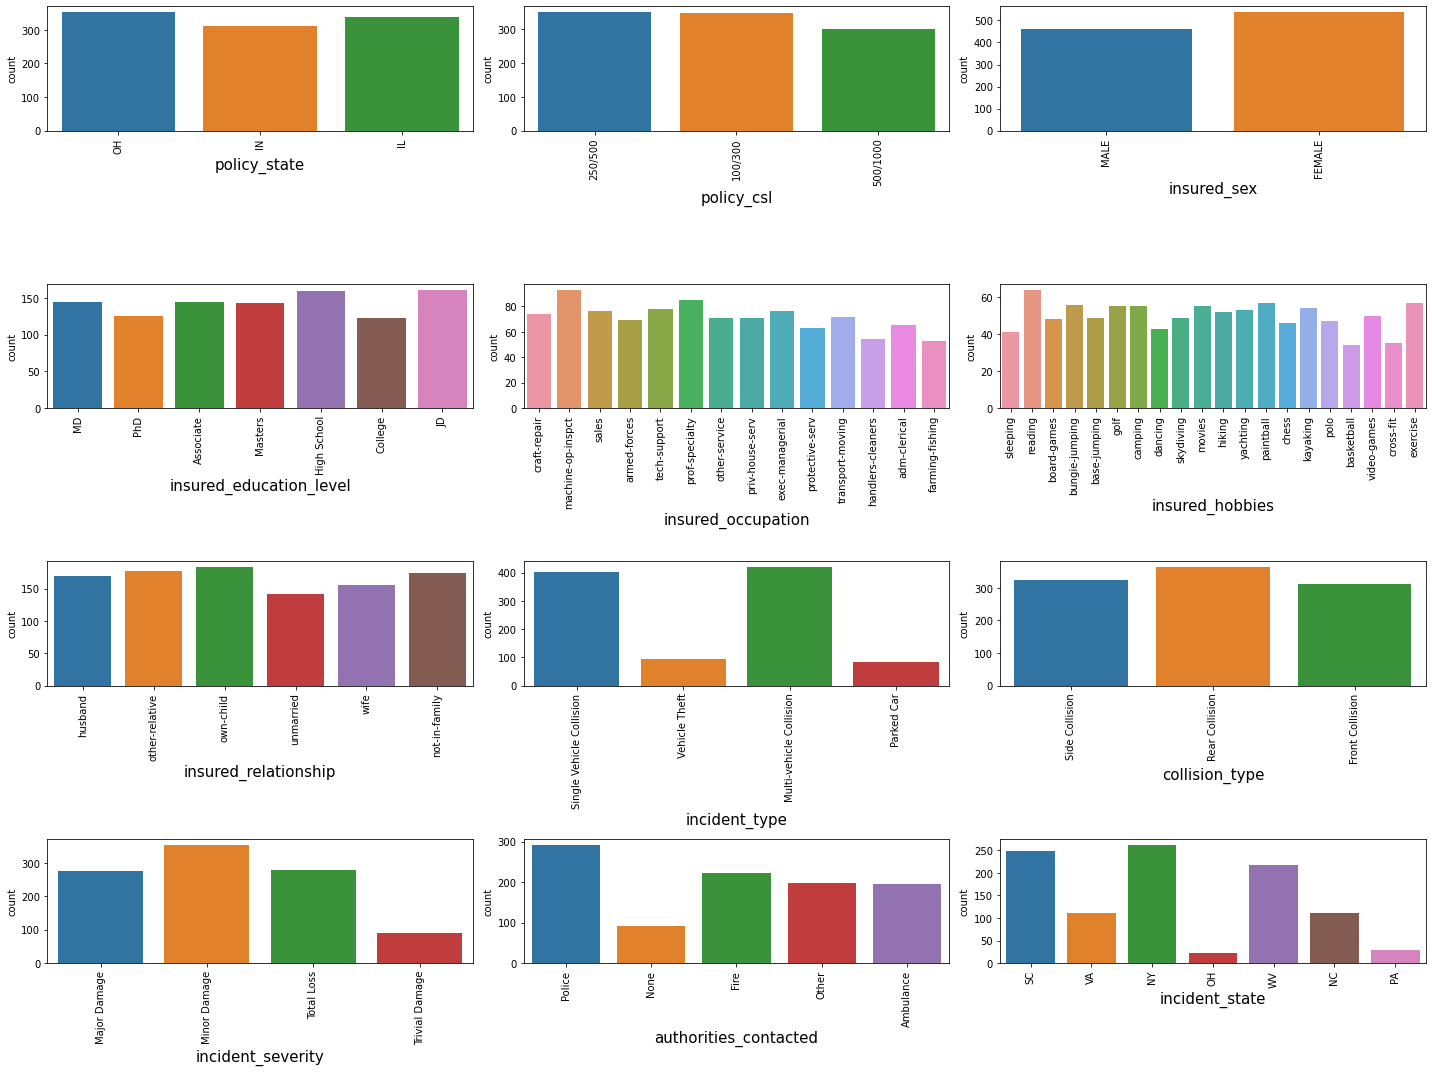

In [90]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in data[cat_data]:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber) 
        sns.countplot(data[cat_data][column])
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation=90)
        
    plotnumber+=1
    
plt.tight_layout()

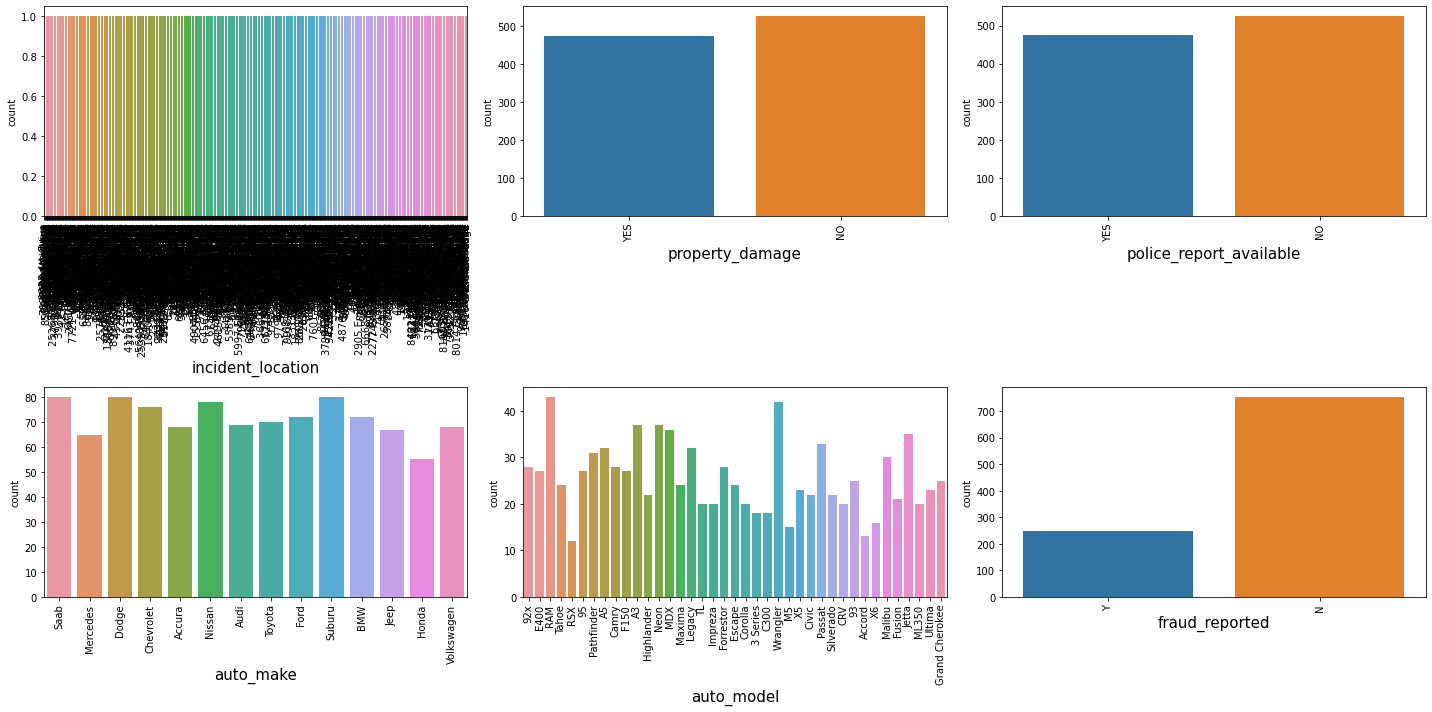

In [102]:
plt.figure(figsize=(20,10))
plotnumber=1
for column in data[cat_data[13:19]]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber) 
        sns.countplot(data[cat_data][column])
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation=90)
        
    plotnumber+=1
    
plt.tight_layout()

In [60]:
data['incident_location'].nunique() # incident location has 1000 unique values and also location not gives any information so we can remove this 

1000

In [26]:
data.drop('incident_location',axis=1,inplace=True)

In [ ]:
#observation:-
#in the policy state 3 categories are present and those three are contains almost equal number of counts
#policy-csl is also same as policy state means contains three categories
#in the insured sex female policy holders are high compared to male
#in the feature insured edcation is 7 categories on those categories policy holder with education is high school are more and college is less count
#occupation is contain 14 features apart from 14 machine op inspt are has high count
#most of the policy holders hobbie is reading we can say
#in the relationship owbn child category is high and not in family, other relative, husband are as follows
#in the type of insident most of the insidents are ocuured with multi vehicle and single vehicle collision vehicl theft and car parked are less
#insident severity most of the vehicles are minor damage and major damage and total loss are also has more count but less than minor damage
#police has high count in the authorities_contacted and next is fire and ambulance are as follows
#in the incident state NY has the high count 
#comparing to property damage 'yes' is less
#most of the don't have police report
#in the auto make saab and dodge are having high number and less is honda and remaining all are maintaines almost equal number of counts
#in the auto model there are mainly two are in the high count they are 'RAM' and 'WRANGLER'
#fraud_report is our target variable and it looks like imbalanced data we have to balance it later 

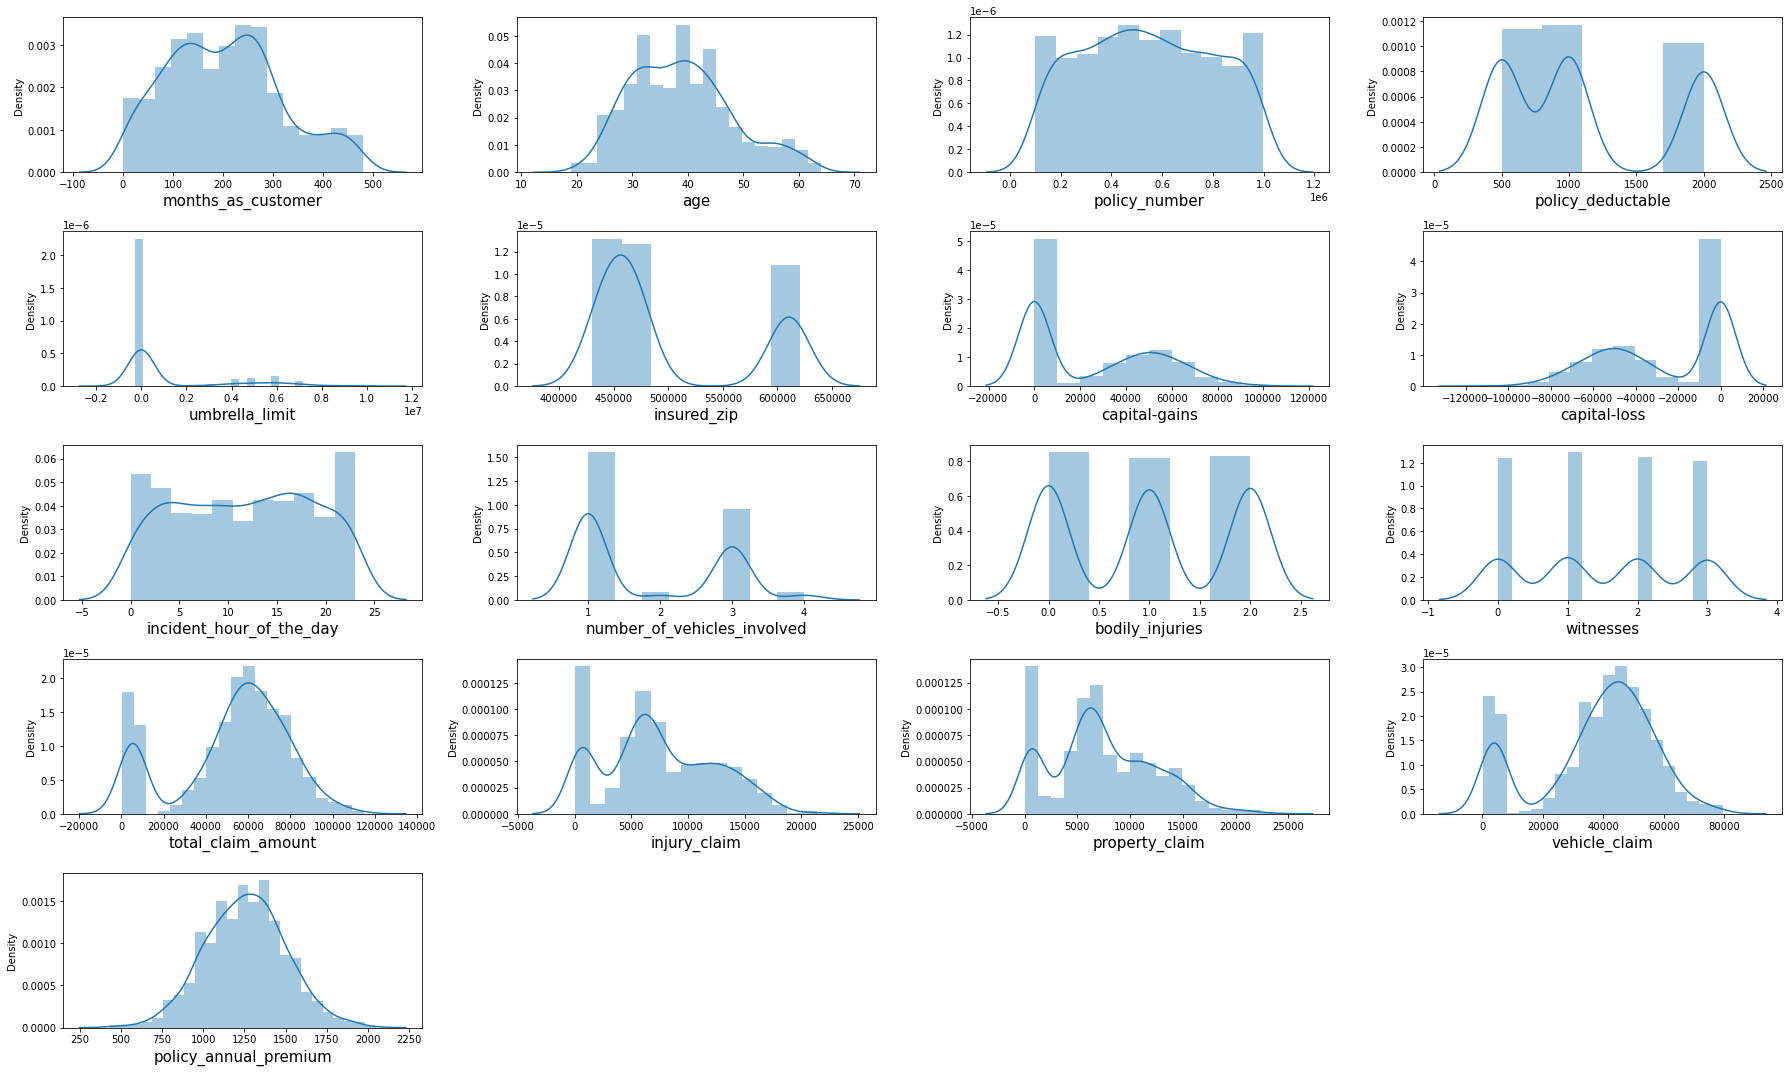

In [79]:
plt.figure(figsize=(25,15))
plotnumber=1
for column in data[numeric_data]:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber) 
        sns.distplot(data[numeric_data][column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
    
plt.tight_layout()

In [82]:
#observation:-
#in the umbrella limit there is high skewnes is present due to most of the policy holder umbrella limit is 0 and also we can see that there is negatively skewed data 
# we'll check it again

# bivariate analysis

In [107]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004-01-01,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,YES,0,0,YES,5070,780,780,3510,Mercedes,E400,2007-01-01,Y
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007-01-01,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,YES,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014-01-01,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Front Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009-01-01,N


In [27]:
cat_data1=cat_data.drop('incident_location')#remove unwanted feature

In [28]:
len(cat_data1)

18

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['fraud_reported']=pd.DataFrame(le.fit_transform(data['fraud_reported']))

In [30]:
data[cat_data1]

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,1
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,YES,YES,Mercedes,E400,1
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,0
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,NO,NO,Chevrolet,Tahoe,1
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Front Collision,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,YES,NO,Honda,Accord,0
996,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,YES,NO,Volkswagen,Passat,0
997,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,NO,YES,Suburu,Impreza,0
998,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,YES,YES,Audi,A5,0


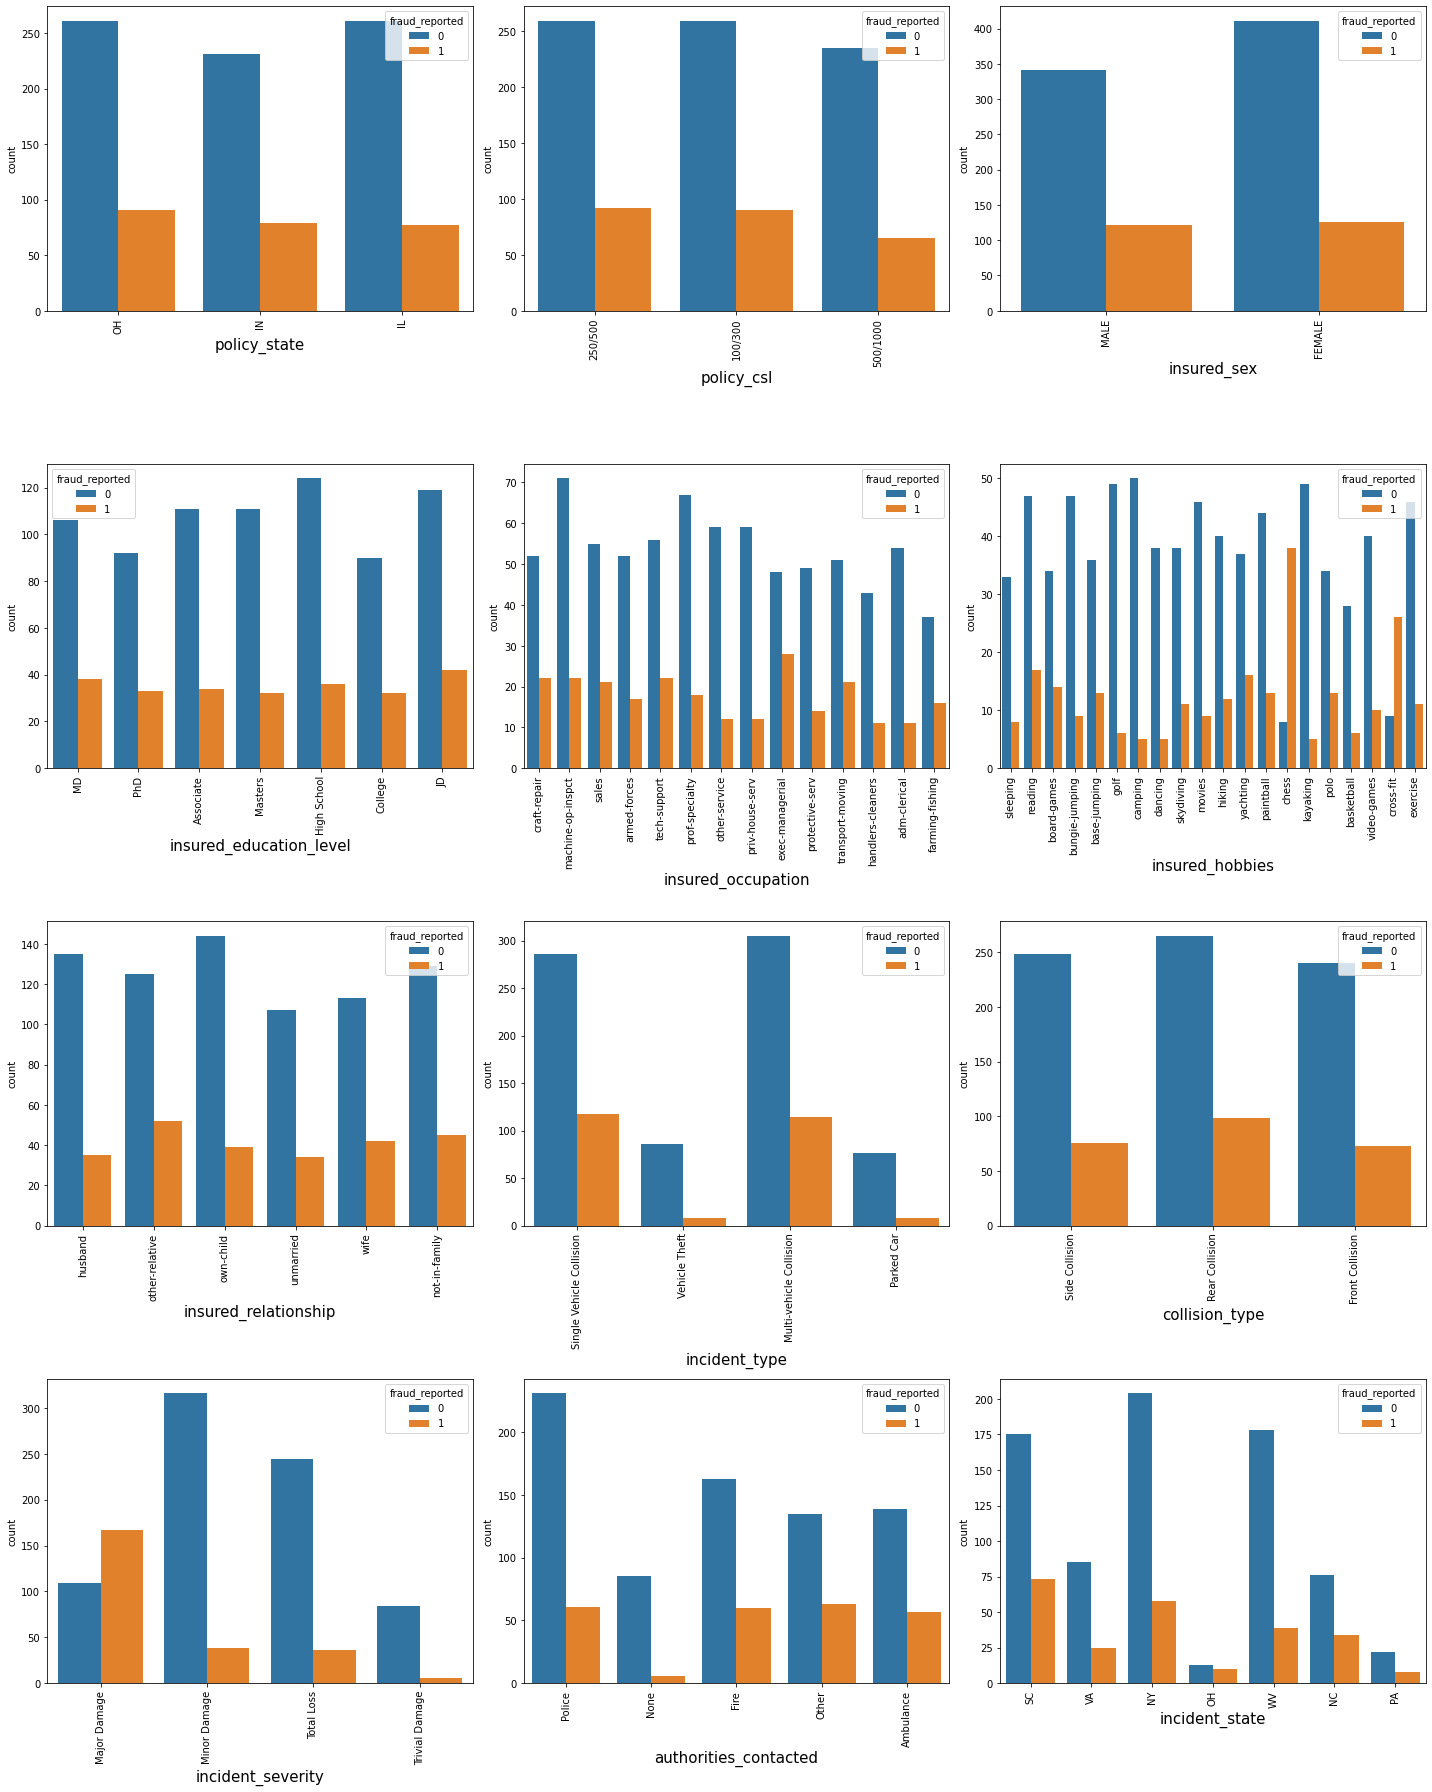

In [148]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in data[cat_data1]:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber) 
        sns.countplot(data[cat_data1][column],hue='fraud_reported',data=data)
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation=90)
        
    plotnumber+=1
    
plt.tight_layout()

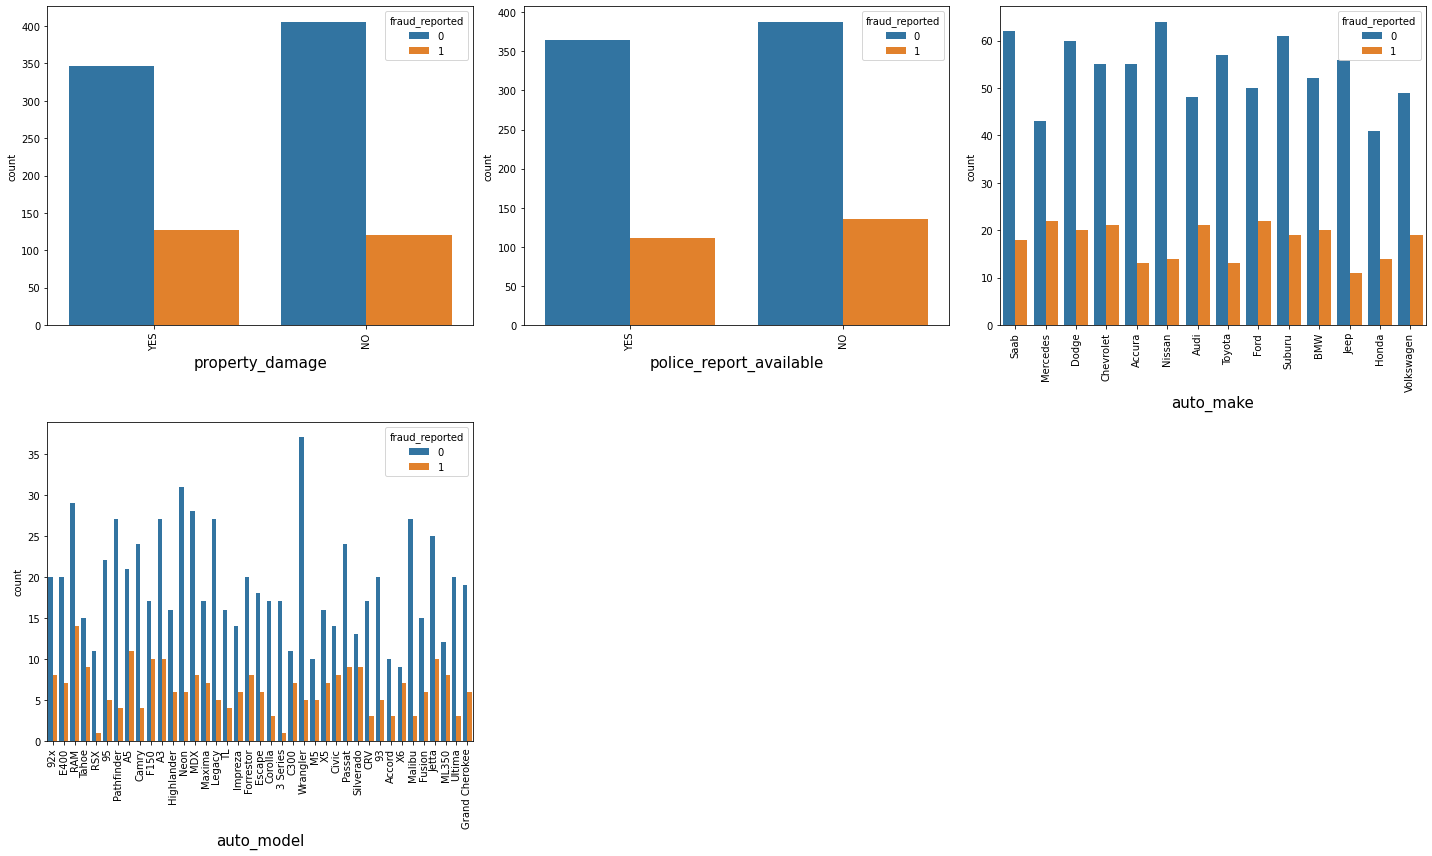

In [152]:
plt.figure(figsize=(20,12))
plotnumber=1
for column in data[cat_data1[13:17]]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber) 
        sns.countplot(data[cat_data1][column],hue='fraud_reported',data=data)
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation=90)
        
    plotnumber+=1
    
plt.tight_layout()

In [ ]:
#observation:-
#in the insured hobbies,in the hobbi of chess category frau_reported is high i,e more than 50% 
#in the case of major damage fraud_reported is chance is high 


In [153]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004-01-01,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,YES,0,0,YES,5070,780,780,3510,Mercedes,E400,2007-01-01,1
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007-01-01,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,YES,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014-01-01,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Front Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009-01-01,0


# encoding categorical features

In [68]:
data[cat_data1].head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,1
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Front Collision,Minor Damage,Police,VA,Riverwood,NO,YES,Mercedes,E400,1
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,0
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,NO,NO,Chevrolet,Tahoe,1
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Side Collision,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,0


In [31]:
data['insured_education_level'].value_counts()#use ordinal Encoder

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [32]:
data['incident_severity'].value_counts()#use ordinal encoder

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [33]:
data[cat_data1].nunique()

policy_state                3
policy_csl                  3
insured_sex                 2
insured_education_level     7
insured_occupation         14
insured_hobbies            20
insured_relationship        6
incident_type               4
collision_type              3
incident_severity           4
authorities_contacted       5
incident_state              7
incident_city               7
property_damage             2
police_report_available     2
auto_make                  14
auto_model                 39
fraud_reported              2
dtype: int64

In [34]:
data[cat_data1].shape

(1000, 18)

In [35]:
#observations:-
#ican use label encoder for two categories features
d0=['insured_sex','property_damage','police_report_available']
#one hot encoding for more than two and less than 6 categories
d1=['policy_state','policy_csl','incident_type','collision_type','authorities_contacted']
#i can use binary encoder for more than 6 category features
d2=['insured_occupation','insured_hobbies','insured_relationship','incident_state','incident_city','auto_make','auto_model']
#i can use ordinal encoder for two features education and incident severity
d3=['insured_education_level','incident_severity']

In [36]:
len(d0)+len(d1)+len(d2)+len(d3)
#fraud_reported is already encoded reamining are 17 


17

In [37]:
d0

['insured_sex', 'property_damage', 'police_report_available']

In [38]:
data[d0]=data[d0].apply(le.fit_transform)#applying lebel encoder 

In [39]:
dumies=pd.get_dummies(data[d1],drop_first=True)#get_dummies

In [40]:
dumies

,policy_state_IN,policy_state_OH,policy_csl_250/500,policy_csl_500/1000,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,0,1,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,1,1,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,1,0,0,0,1,0,0,0
996,0,0,0,0,0,1,0,1,0,1,0,0,0
997,0,1,1,0,0,0,0,0,1,0,0,0,1
998,0,0,0,1,0,1,0,1,0,0,0,1,0


In [41]:
from category_encoders import BinaryEncoder
bi_enc=BinaryEncoder()
binary=bi_enc.fit_transform(data[d2])
binary

,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,insured_hobbies_0,insured_hobbies_1,insured_hobbies_2,insured_hobbies_3,insured_hobbies_4,insured_relationship_0,insured_relationship_1,insured_relationship_2,incident_state_0,incident_state_1,incident_state_2,incident_city_0,incident_city_1,incident_city_2,auto_make_0,auto_make_1,auto_make_2,auto_make_3,auto_model_0,auto_model_1,auto_model_2,auto_model_3,auto_model_4,auto_model_5
0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1
3,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0
996,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0
997,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,0,1,0,0,1,0,0,1,0
998,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,1,0,0,1,0,0,0


In [42]:
data['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [43]:
data['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [44]:
from sklearn.preprocessing import OrdinalEncoder
ord_en=OrdinalEncoder(categories=[['High School','College','Associate','Masters','JD','MD','PhD'],['Minor Damage','Trivial Damage','Major Damage','Total Loss']])
data[['insured_education_level','incident_severity']]=ord_en.fit_transform(data[['insured_education_level','incident_severity']])

In [45]:
data['incident_severity'].value_counts()

0.0    354
3.0    280
2.0    276
1.0     90
Name: incident_severity, dtype: int64

In [46]:
data['insured_education_level'].value_counts()

4.0    161
0.0    160
2.0    145
5.0    144
3.0    143
6.0    125
1.0    122
Name: insured_education_level, dtype: int64

In [90]:
df=pd.concat([data,dumies,binary],axis=1)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,...,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,insured_hobbies_0,insured_hobbies_1,insured_hobbies_2,insured_hobbies_3,insured_hobbies_4,insured_relationship_0,insured_relationship_1,insured_relationship_2,incident_state_0,incident_state_1,incident_state_2,incident_city_0,incident_city_1,incident_city_2,auto_make_0,auto_make_1,auto_make_2,auto_make_3,auto_model_0,auto_model_1,auto_model_2,auto_model_3,auto_model_4,auto_model_5
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,1,5.0,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,2.0,Police,SC,Columbus,5,1,1,1,2,1,71610,6510,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,1,5.0,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,0.0,Police,VA,Riverwood,8,1,1,0,0,1,5070,780,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,0,6.0,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,0.0,Police,NY,Columbus,7,3,0,2,3,0,34650,7700,...,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,0,6.0,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,2.0,Police,OH,Arlington,5,1,0,1,2,0,63400,6340,...,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,1,2.0,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Front Collision,0.0,None,NY,Arlington,20,1,0,0,1,0,6500,1300,...,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,0,3.0,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,0.0,Fire,NC,Northbrook,20,1,1,0,1,0,87200,17440,...,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,0,6.0,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,2.0,Fire,SC,Northbend,23,1,1,2,3,0,108480,18080,...,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,0,3.0,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,0.0,Police,NC,Arlington,4,3,0,2,3,1,67500,7500,...,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,0,1,0,0,1,0,0,1,0
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,1,2.0,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,2.0,Other,NY,Arlington,2,1,1,0,1,1,46980,5220,...,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,1,0,0,1,0,0,0


In [91]:
#drop duplicate columns
df.drop(['insured_sex','property_damage','police_report_available','policy_state','policy_csl','incident_type','collision_type','authorities_contacted','insured_occupation','insured_hobbies','insured_relationship','incident_state','incident_city','auto_make','auto_model'],axis=1,inplace=True)

In [92]:
df.shape

(1000, 64)

In [93]:
pd.set_option("display.max_columns",64)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,capital-gains,capital-loss,incident_date,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_state_IN,policy_state_OH,policy_csl_250/500,policy_csl_500/1000,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,insured_hobbies_0,insured_hobbies_1,insured_hobbies_2,insured_hobbies_3,insured_hobbies_4,insured_relationship_0,insured_relationship_1,insured_relationship_2,incident_state_0,incident_state_1,incident_state_2,incident_city_0,incident_city_1,incident_city_2,auto_make_0,auto_make_1,auto_make_2,auto_make_3,auto_model_0,auto_model_1,auto_model_2,auto_model_3,auto_model_4,auto_model_5
0,328,48,521585,2014-10-17,1000,1406.91,0,466132,5.0,53300,0,2015-01-25,2.0,5,1,1,2,71610,6510,13020,52080,2004-01-01,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,228,42,342868,2006-06-27,2000,1197.22,5000000,468176,5.0,0,0,2015-01-21,0.0,8,1,0,0,5070,780,780,3510,2007-01-01,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,134,29,687698,2000-06-09,2000,1413.14,5000000,430632,6.0,35100,0,2015-02-22,0.0,7,3,2,3,34650,7700,3850,23100,2007-01-01,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1
3,256,41,227811,1990-05-25,2000,1415.74,6000000,608117,6.0,48900,-62400,2015-10-01,2.0,5,1,1,2,63400,6340,6340,50720,2014-01-01,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
4,228,44,367455,2014-06-06,1000,1583.91,6000000,610706,2.0,66000,-46000,2015-02-17,0.0,20,1,0,1,6500,1300,650,4550,2009-01-01,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1


In [94]:
#drop unwanted columns
df.drop(['policy_number','insured_zip'],axis=1,inplace=True)
df.shape

(1000, 62)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   months_as_customer                      1000 non-null   int64         
 1   age                                     1000 non-null   int64         
 2   policy_bind_date                        1000 non-null   datetime64[ns]
 3   policy_deductable                       1000 non-null   int64         
 4   policy_annual_premium                   1000 non-null   float64       
 5   umbrella_limit                          1000 non-null   int64         
 6   insured_education_level                 1000 non-null   float64       
 7   capital-gains                           1000 non-null   int64         
 8   capital-loss                            1000 non-null   int64         
 9   incident_date                           1000 non-null

In [95]:
#we observe that there is dates available in our data set,i can convert those dates into days
df['duration_claim']=(df.incident_date-df.policy_bind_date).dt.days
df['duration_car']=(df.incident_date-df.auto_year).dt.days


In [96]:
#remove the original columns of dates
df.drop(['policy_bind_date','incident_date','auto_year'],axis=1,inplace=True)

In [97]:
df.shape

(1000, 61)

In [104]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_state_IN,policy_state_OH,policy_csl_250/500,policy_csl_500/1000,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,insured_hobbies_0,insured_hobbies_1,insured_hobbies_2,insured_hobbies_3,insured_hobbies_4,insured_relationship_0,insured_relationship_1,insured_relationship_2,incident_state_0,incident_state_1,incident_state_2,incident_city_0,incident_city_1,incident_city_2,auto_make_0,auto_make_1,auto_make_2,auto_make_3,auto_model_0,auto_model_1,auto_model_2,auto_model_3,auto_model_4,auto_model_5,duration_claim,duration_car
0,328,48,1000,1406.91,0,5.0,53300,0,2.0,5,1,1,2,71610,6510,13020,52080,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,100,4042
1,228,42,2000,1197.22,5000000,5.0,0,0,0.0,8,1,0,0,5070,780,780,3510,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,3130,2942
2,134,29,2000,1413.14,5000000,6.0,35100,0,0.0,7,3,2,3,34650,7700,3850,23100,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1,5371,2974
3,256,41,2000,1415.74,6000000,6.0,48900,-62400,2.0,5,1,1,2,63400,6340,6340,50720,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,9260,638
4,228,44,1000,1583.91,6000000,2.0,66000,-46000,0.0,20,1,0,1,6500,1300,650,4550,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,256,2238


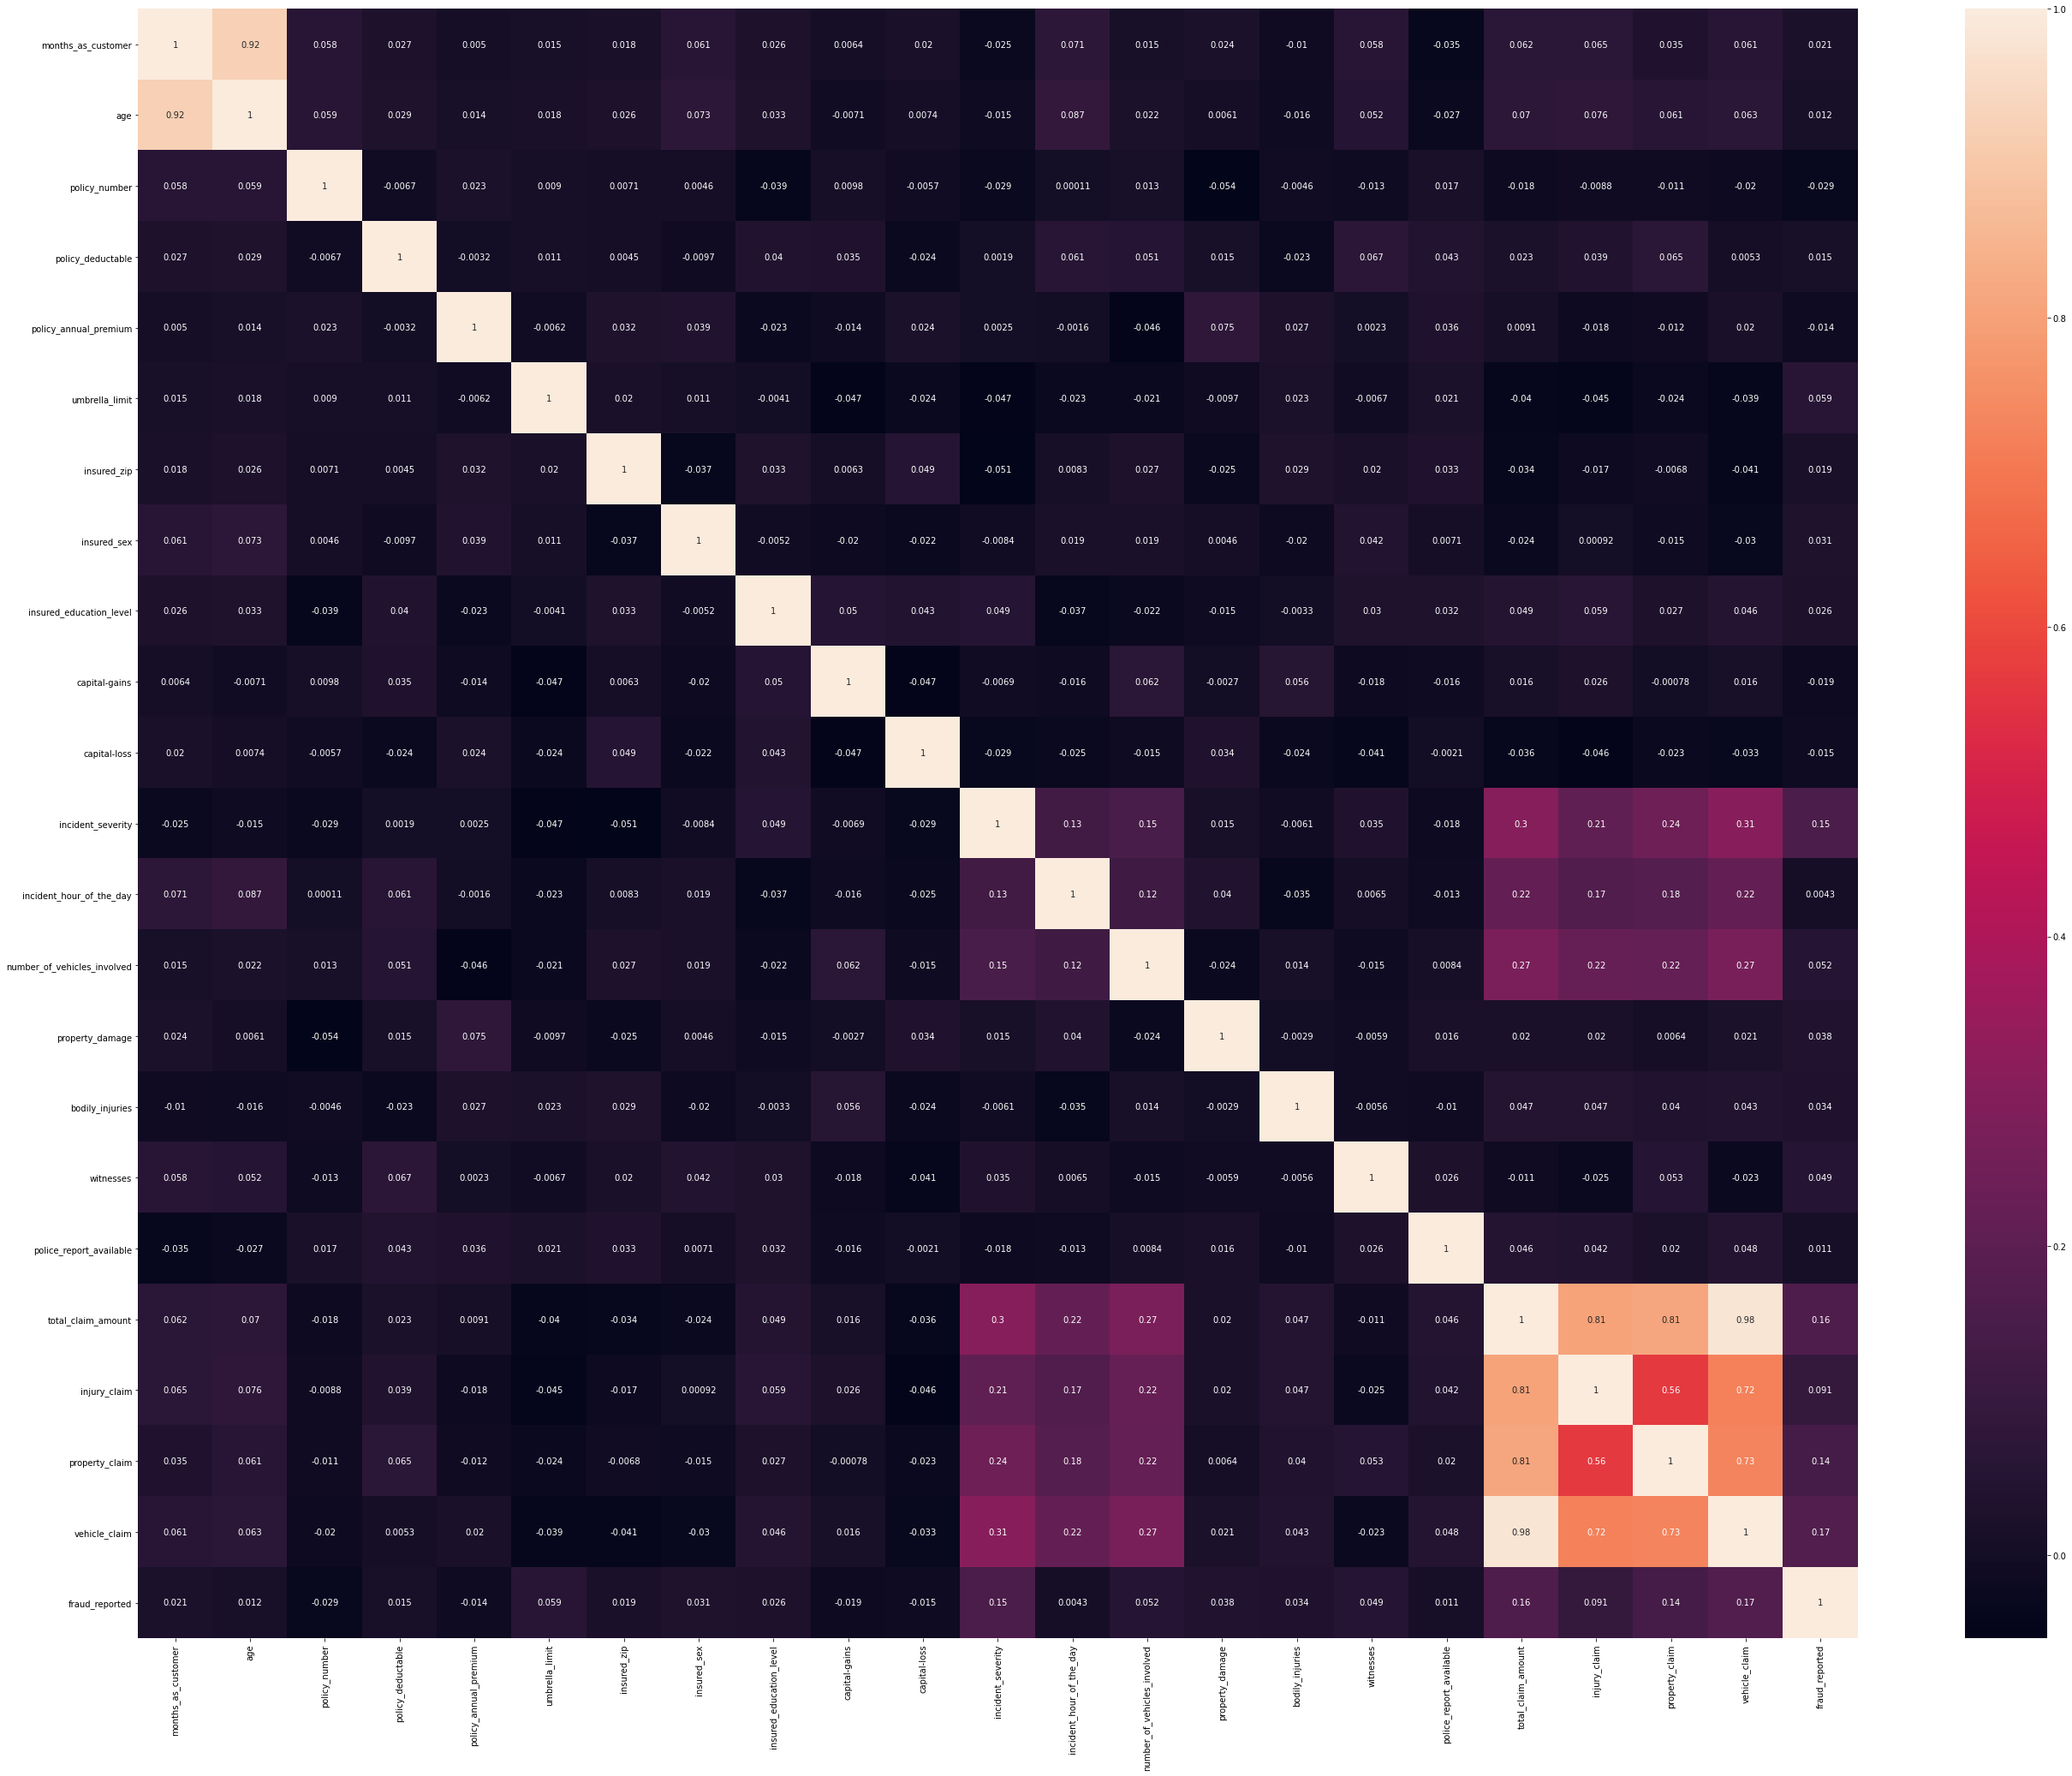

In [56]:
#correlation matrix
plt.figure(figsize=(45,35))
sns.heatmap(data.corr(),annot=True,linecolor='white')
plt.show()

In [98]:
#we can see that age and onths as a customer are highly correlating with each other and moths as a customer is high correlation with our target variable
#age is less correlation comp[aring with months as a customer so i can remove age 
#total claim amount and vehicle claim are highly correlated and vehicle claim has high correation with the target variable so i can remove total claim amount
df.drop(['age','total_claim_amount'],axis=1,inplace=True)
df.shape

(1000, 59)

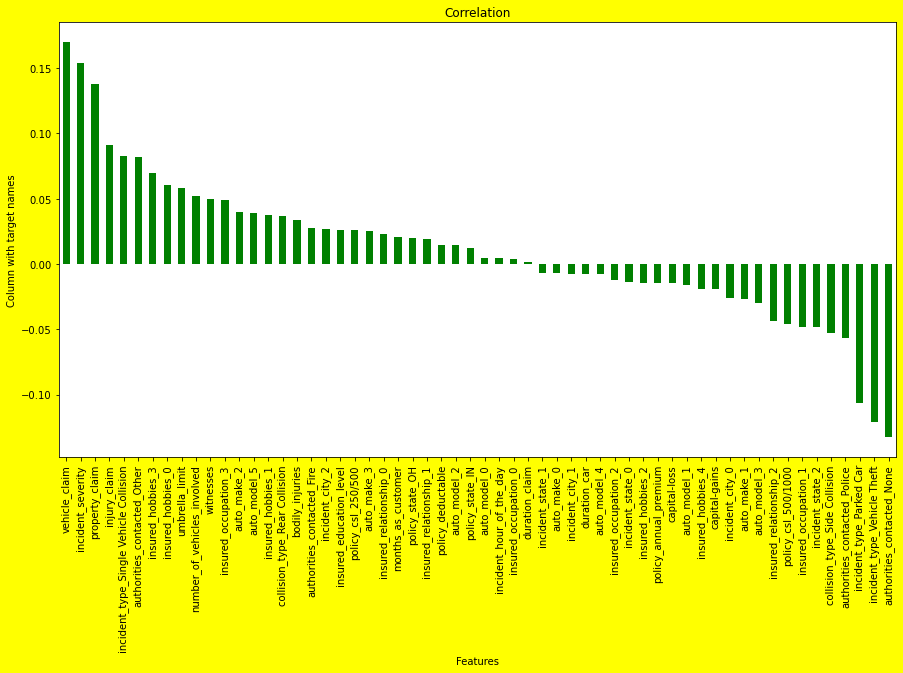

In [58]:
plt.figure(figsize =(15, 8),facecolor='yellow')
df.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind ='bar', color ='green')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()


In [99]:
numeric_data

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'policy_annual_premium'],
      dtype='object')

In [100]:
num_data=['months_as_customer','policy_deductable',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses','injury_claim',
       'property_claim', 'vehicle_claim', 'policy_annual_premium']

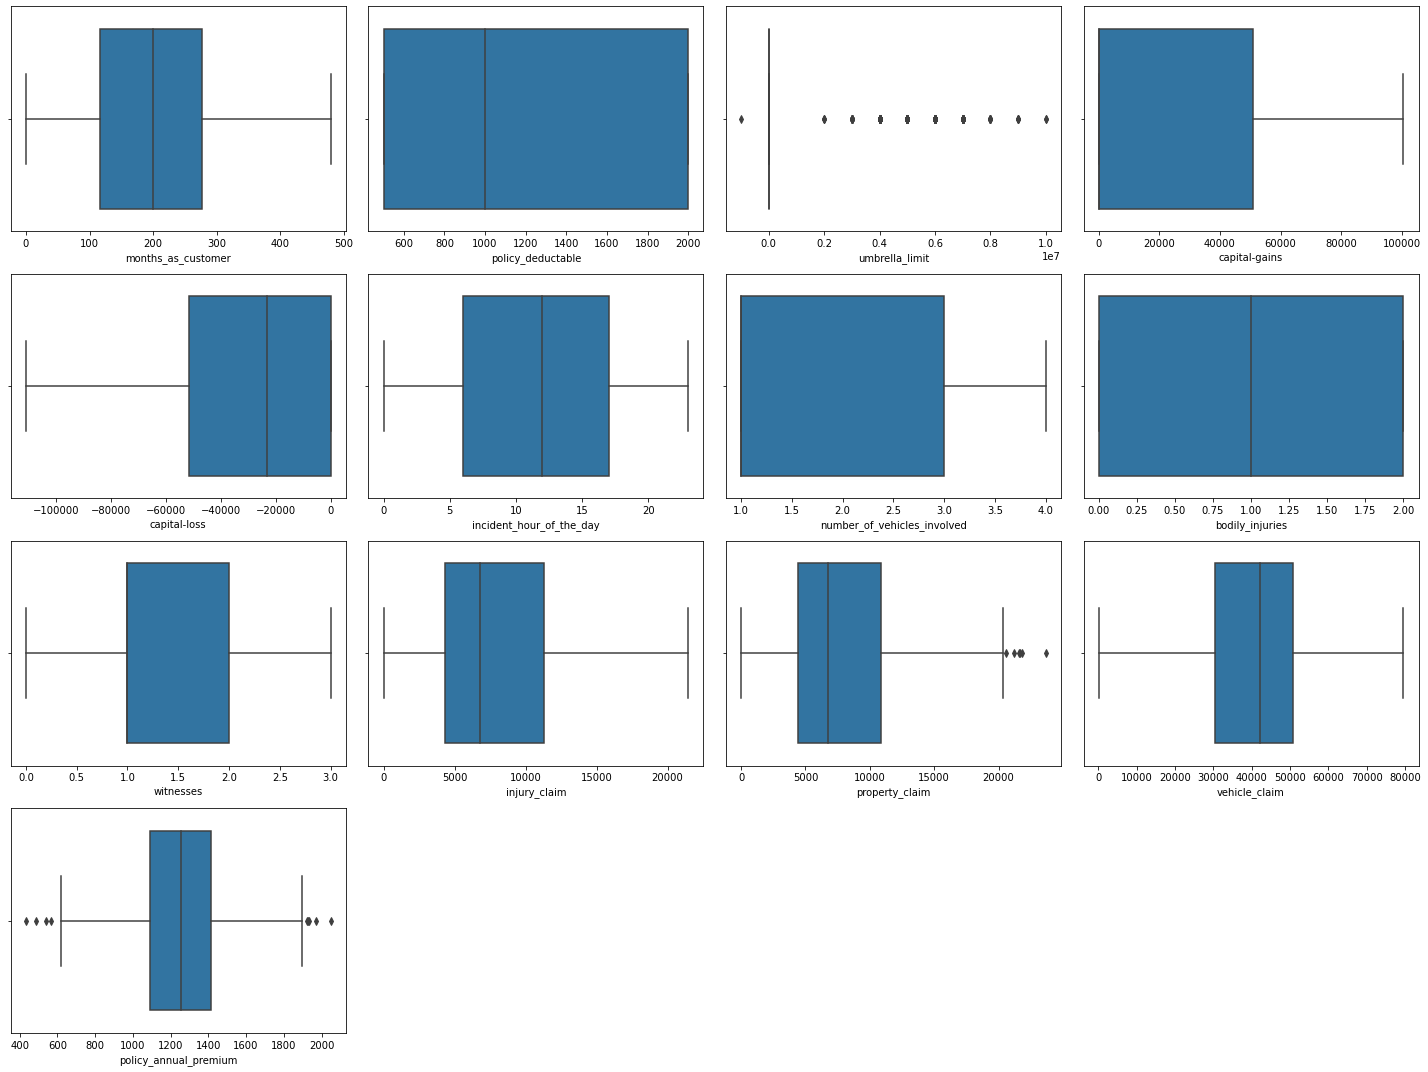

In [68]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df[num_data]:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[num_data][column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
    
plt.tight_layout()

In [101]:
#umbrella limit shows outliers because most of the policy holders umbrella limit is 0 that's why it showing outliers these outliers are important information so we don't remove these 
#but in the umbrella limit there is a negative umbrella limit we have to remove this because it does not make any sence 
#property claim and policy_annual_premium are having outliers but these are also important data we cannot remove this data 
q3=df.quantile(0.75)
q1=df.quantile(0.25)
iqr=q3-q1

In [102]:
limit_low=q1.umbrella_limit-(1.5*iqr.umbrella_limit)
limit_low

0.0

In [103]:
#check the indexes which have higher values
index= np.where (df['umbrella_limit']<limit_low)
index

(array([290], dtype=int64),)

In [104]:
df['umbrella_limit'].loc[290]

-1000000

In [105]:
df.shape

(1000, 59)

In [106]:
#i can remove this data from umbrella limit 
#drop the index which we found in the above cell
df= df.drop(df.index[index])
df.shape

(999, 59)

In [107]:
df[num_data].skew()

months_as_customer             0.364014
policy_deductable              0.476426
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
policy_annual_premium          0.005374
dtype: float64

In [119]:
#umbrella limit,vehicle claim has skewed data 
#applying powertransformation to remove the skewness 
from sklearn.preprocessing import PowerTransformer
ptr=PowerTransformer()
df[['umbrella_limit','vehicle_claim']]=ptr.fit_transform(df[['umbrella_limit','vehicle_claim']])
df[['umbrella_limit','vehicle_claim']].skew()

umbrella_limit    1.492893
vehicle_claim    -0.523647
dtype: float64

In [ ]:
#since most of the data in umbrella limit is 0 so  we cannot decrease less than 1.4 and this is the least value apart from all other techniques  

In [121]:
df.skew()

months_as_customer                        0.364014
policy_deductable                         0.476426
policy_annual_premium                     0.005374
umbrella_limit                            1.492893
insured_education_level                  -0.029831
capital-gains                             0.477220
capital-loss                             -0.389813
incident_severity                        -0.076215
incident_hour_of_the_day                 -0.034990
number_of_vehicles_involved               0.501009
bodily_injuries                           0.012940
witnesses                                 0.018399
injury_claim                              0.265382
property_claim                            0.378121
vehicle_claim                            -0.523647
fraud_reported                            1.173510
policy_state_IN                           0.821300
policy_state_OH                           0.623689
policy_csl_250/500                        0.623689
policy_csl_500/1000            

In [ ]:
# skewness in numerical data is in acceptable range

In [131]:
#split the data into independent and dependent
X=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [132]:
X.shape,y.shape

((999, 58), (999,))

In [133]:
#balance the target variable by using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [134]:
y.shape

(1504,)

In [135]:
X.shape

(1504, 58)

In [136]:
#scaling the data by using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_state_IN,policy_state_OH,policy_csl_250/500,policy_csl_500/1000,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,insured_hobbies_0,insured_hobbies_1,insured_hobbies_2,insured_hobbies_3,insured_hobbies_4,insured_relationship_0,insured_relationship_1,insured_relationship_2,incident_state_0,incident_state_1,incident_state_2,incident_city_0,incident_city_1,incident_city_2,auto_make_0,auto_make_1,auto_make_2,auto_make_3,auto_model_0,auto_model_1,auto_model_2,auto_model_3,auto_model_4,auto_model_5,duration_claim,duration_car
0,0.684760,0.333333,0.603112,0.000000,0.833333,0.530348,1.000000,0.666667,0.217391,0.000000,0.5,0.666667,0.303497,0.550063,0.630489,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.012704,0.531213
1,0.475992,1.000000,0.473214,0.998325,0.833333,0.000000,1.000000,0.000000,0.347826,0.000000,0.0,0.000000,0.036364,0.032953,0.033075,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333474,0.386647
2,0.279749,1.000000,0.606972,0.998325,1.000000,0.349254,1.000000,0.000000,0.304348,0.666667,1.0,1.000000,0.358974,0.162653,0.260086,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.570718,0.390853
3,0.534447,1.000000,0.608582,0.998801,1.000000,0.486567,0.438344,0.666667,0.217391,0.000000,0.5,0.666667,0.295571,0.267850,0.612584,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.982426,0.083848
4,0.475992,0.333333,0.712760,0.998801,0.333333,0.656716,0.585959,0.000000,0.869565,0.000000,0.0,0.333333,0.060606,0.027461,0.044019,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.029219,0.294125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,0.156576,0.012000,0.311156,0.000000,0.166667,0.472159,1.000000,0.641790,0.608696,0.333333,0.5,0.333333,0.433427,0.404858,0.568439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.746242,0.232619
1500,0.338205,0.174000,0.536169,0.000000,0.681434,0.000000,1.000000,0.318566,0.434783,0.333333,0.5,0.333333,0.341352,0.765441,0.670615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.726763,0.672887
1501,0.465553,0.158667,0.450125,0.000000,0.398136,0.470129,0.381584,1.000000,0.260870,0.000000,0.0,0.333333,0.295245,0.400760,0.488301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.482956,0.873702
1502,0.260960,1.000000,0.229368,0.326096,0.329910,0.000000,0.513933,0.666667,0.608696,0.333333,0.5,0.333333,0.501026,0.226996,0.417465,0.0,1.0,0.0,0

# model building

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
lr=LogisticRegression()

In [138]:
#finding best random state 
maxAccu=0
maxRS=0
for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    predx=lr.predict(x_test)
    acc=accuracy_score(y_test,predx)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('best accuracy is',maxAccu,'on random_state',maxRS)   

best accuracy is 0.8377659574468085 on random_state 576


In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=576)

In [149]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n==========train results============")
        print(f'accuracy score:{accuracy_score(y_train,y_pred)*100:2f}%')
        
    elif train==False:
        pred=clf.predict(x_test)
        print('\n=========test reslts===========')
        print(f'accuracy score is:{accuracy_score(y_test,pred)*100:2f}%')
        print('\n')
        print(confusion_matrix(y_test,pred))
        print('\n')
        print(classification_report(y_test,pred))
        scr=cross_val_score(clf,x,y,cv=20)
        print('cross validation score',scr.mean())
        

In [150]:
# Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:80.407801%

=========test reslts===========
accuracy score is:83.776596%


[[173  12]
 [ 49 142]]


              precision    recall  f1-score   support

           0       0.78      0.94      0.85       185
           1       0.92      0.74      0.82       191

    accuracy                           0.84       376
   macro avg       0.85      0.84      0.84       376
weighted avg       0.85      0.84      0.84       376

cross validation score 0.7886052631578948


In [151]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:81.560284%

=========test reslts===========
accuracy score is:80.585106%


[[121  64]
 [  9 182]]


              precision    recall  f1-score   support

           0       0.93      0.65      0.77       185
           1       0.74      0.95      0.83       191

    accuracy                           0.81       376
   macro avg       0.84      0.80      0.80       376
weighted avg       0.83      0.81      0.80       376

cross validation score 0.7714561403508772


In [152]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dcfr=DecisionTreeClassifier()
dcfr.fit(x_train,y_train)
print_score(dcfr,x_train,x_test,y_train,y_test,train=True)
print_score(dcfr,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:100.000000%

=========test reslts===========
accuracy score is:81.382979%


[[154  31]
 [ 39 152]]


              precision    recall  f1-score   support

           0       0.80      0.83      0.81       185
           1       0.83      0.80      0.81       191

    accuracy                           0.81       376
   macro avg       0.81      0.81      0.81       376
weighted avg       0.81      0.81      0.81       376

cross validation score 0.8042368421052632


In [153]:
#random forest classifier 
from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier()
rfclf.fit(x_train,y_train)
print_score(rfclf,x_train,x_test,y_train,y_test,train=True)
print_score(rfclf,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:100.000000%

=========test reslts===========
accuracy score is:85.372340%


[[172  13]
 [ 42 149]]


              precision    recall  f1-score   support

           0       0.80      0.93      0.86       185
           1       0.92      0.78      0.84       191

    accuracy                           0.85       376
   macro avg       0.86      0.85      0.85       376
weighted avg       0.86      0.85      0.85       376

cross validation score 0.8655526315789475


In [154]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:89.273050%

=========test reslts===========
accuracy score is:83.244681%


[[183   2]
 [ 61 130]]


              precision    recall  f1-score   support

           0       0.75      0.99      0.85       185
           1       0.98      0.68      0.80       191

    accuracy                           0.83       376
   macro avg       0.87      0.83      0.83       376
weighted avg       0.87      0.83      0.83       376

cross validation score 0.8286140350877194


In [155]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

gbdt.fit(x_train,y_train)
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:94.858156%

=========test reslts===========
accuracy score is:85.372340%


[[161  24]
 [ 31 160]]


              precision    recall  f1-score   support

           0       0.84      0.87      0.85       185
           1       0.87      0.84      0.85       191

    accuracy                           0.85       376
   macro avg       0.85      0.85      0.85       376
weighted avg       0.85      0.85      0.85       376

cross validation score 0.8541315789473686


In [156]:
#plotting ROC AUC curve 
from sklearn.metrics import plot_roc_curve,roc_auc_score


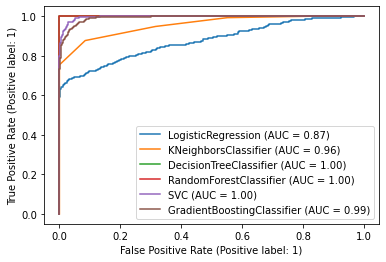

In [157]:
#how wel our model is works on training data 
disp=plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dcfr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfclf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(gbdt,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

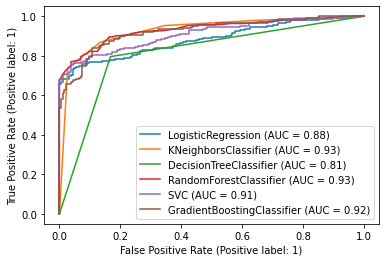

In [158]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dcfr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfclf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [ ]:
#random forest classifier gives best score 

In [159]:
#hyper prameter tunning 
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
params={'criterion': ['entropy','gini'],
            'n_estimators': [150,170,180],
            'max_depth' :[4,5,8,7,],
            'min_samples_split':[5,10],
            'min_samples_leaf':[5,7],
            'max_features':['auto','sqrt','log2']
             }

grd=GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print('best params==>', grd.best_params_)

rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred)


best params==> {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 180}


In [160]:
rf_conf_mat

array([[175,  10],
       [ 41, 150]], dtype=int64)

In [161]:
accuracy_score(y_test,y_pred)

0.8643617021276596

In [164]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       185
           1       0.94      0.79      0.85       191

    accuracy                           0.86       376
   macro avg       0.87      0.87      0.86       376
weighted avg       0.87      0.86      0.86       376



In [165]:
#save the model
import pickle
filename='insurance claim fraud predction.pkl'
pickle.dump(grd,open(filename,'wb'))

In [166]:
#conclusion
loaded_model= pickle.load(open('insurance claim fraud predction.pkl', 'rb'))
results=loaded_model.score(x_test,y_test)
print('test score score is:-',results)

test score score is:- 0.8537234042553191


In [167]:
#conclusion

conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,...,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375
predicted,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
original,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
